In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#importing required libraries(not sklearn here becuase it will be added when necessary)

## Data Examination

In [68]:
import copy
rawData = pd.read_csv('insurance.csv') ## copying raw data to the data var I'll be using
data = copy.copy(rawData)
data

#Importing and showing the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


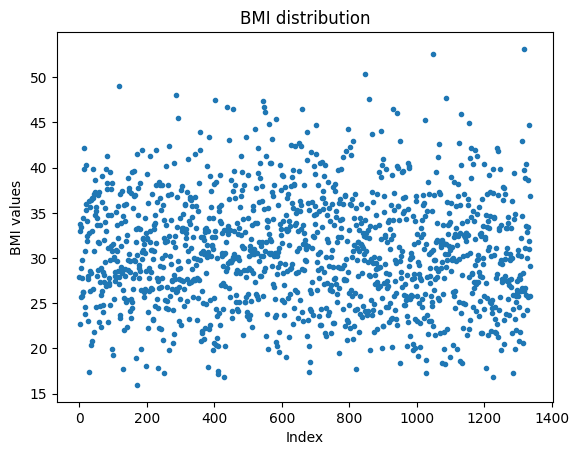

In [69]:

plt.plot(data['bmi'],".")
plt.ylabel("BMI values")
plt.xlabel("Index")
plt.title("BMI distribution")
plt.show()

#BMI distribution examination, there seems to have outliers but generally a normal mean value of 30

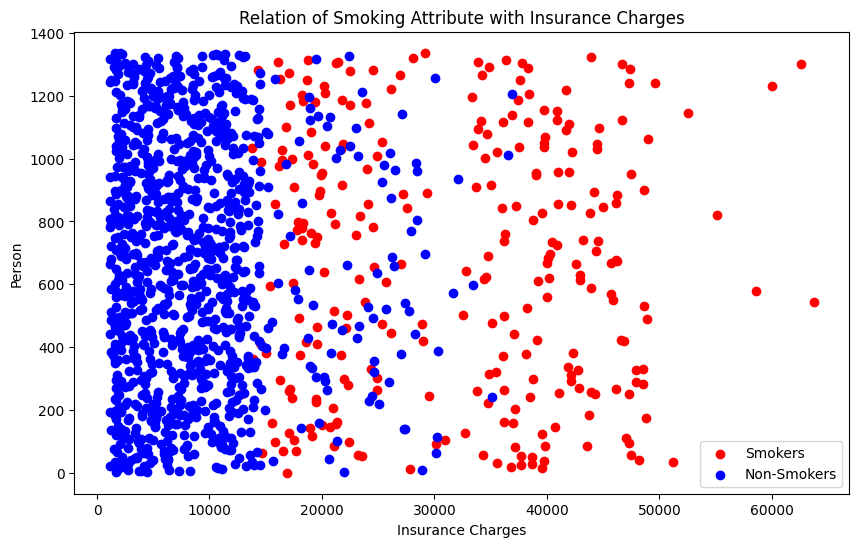

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [70]:
#dividing the smoker data to see the attributes effect on the charges
smokers = data[data['smoker'] == 'yes']
non_smokers = data[data['smoker'] == 'no']

#plotting the data in scattered format
plt.figure(figsize=(10, 6))
plt.scatter(smokers['charges'], smokers.index, color='r', label='Smokers')
plt.scatter(non_smokers['charges'], non_smokers.index, color='b', label='Non-Smokers')
plt.xlabel('Insurance Charges')
plt.ylabel('Person')
plt.title('Relation of Smoking Attribute with Insurance Charges')
plt.legend()
plt.show()

data['region']

#as can be seen the smokers have higher charges overall

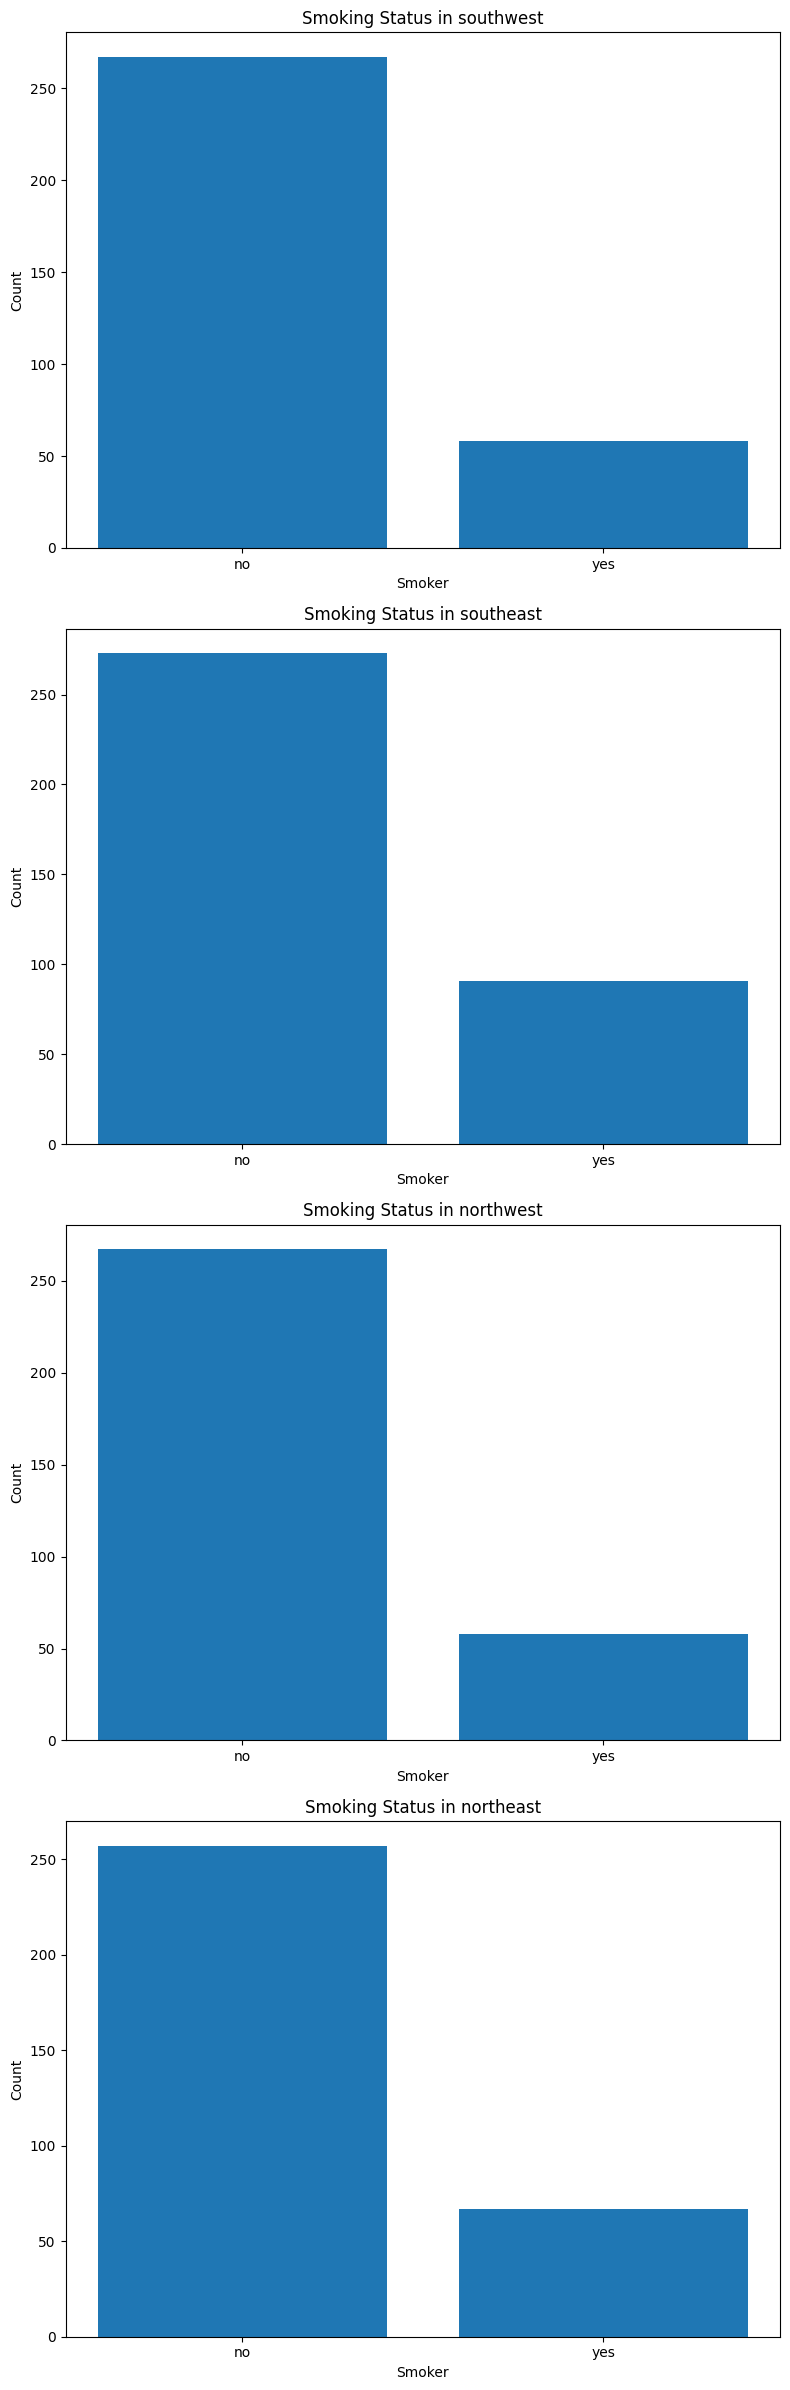

In [71]:
#Getting different regions as an array
regions = data['region'].unique()

# Creating subplots for each region
num_regions = len(regions)
fig, axs = plt.subplots(num_regions, 1, figsize=(8, 6*num_regions))

# Looping through each region and create bar plots
for i, region in enumerate(regions):
    region_data = data[data['region'] == region]
    smoker_counts = region_data['smoker'].value_counts()

    axs[i].bar(smoker_counts.index, smoker_counts.values)
    axs[i].set_title(f'Smoking Status in {region}')
    axs[i].set_xlabel('Smoker')
    axs[i].set_ylabel('Count')

    # Setting x-axis ticks to be 'no' and 'yes'
    axs[i].set_xticks(range(len(smoker_counts)))
    axs[i].set_xticklabels(smoker_counts.index)

plt.tight_layout()
plt.show()

#as seen in the graph there is no significant differance of distribution between regions

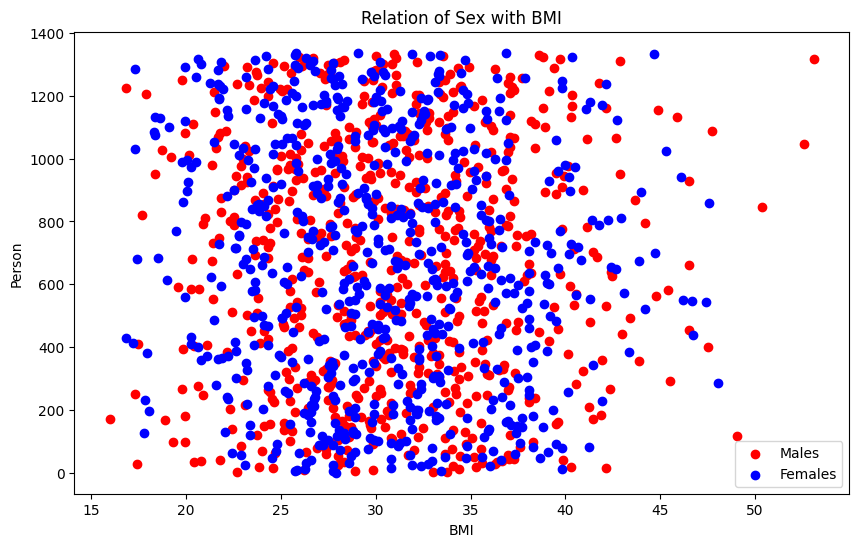

In [72]:
males = data[data['sex'] == 'male']
females = data[data['sex'] == 'female']


plt.figure(figsize=(10,6))
plt.scatter(males['bmi'], males.index, color='r', label='Males')
plt.scatter(females['bmi'], females.index, color='b', label='Females')
plt.xlabel('BMI')
plt.ylabel('Person')
plt.title('Relation of Sex with BMI')
plt.legend()
plt.show()



##As seen from the data there isn't a particular relation between sex and the BMI values

In [73]:
regions = data['region'].unique()

num_regions = len(regions)

max = 0
max_index = ""

for i, region in enumerate(regions):
    region_data = data[data['region'] == region]
    children_count = region_data['children'].value_counts().sum()
    if children_count > max:
      max = children_count
      max_index = region

print(max_index)

## as can be seen from the result the region with the most children is "southeast"

southeast


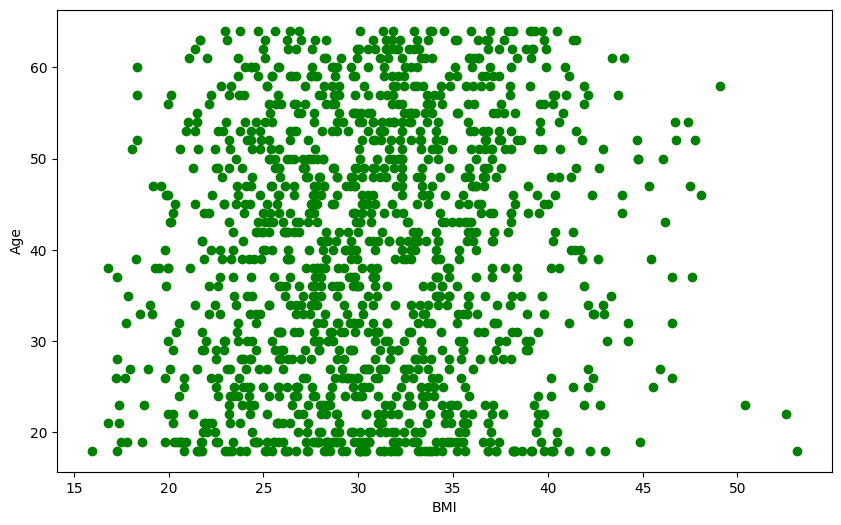

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(data['bmi'],data['age'], color='g', label='BMI-Age relation')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

## General view is that the BMI is genereally in the mid range all across ages

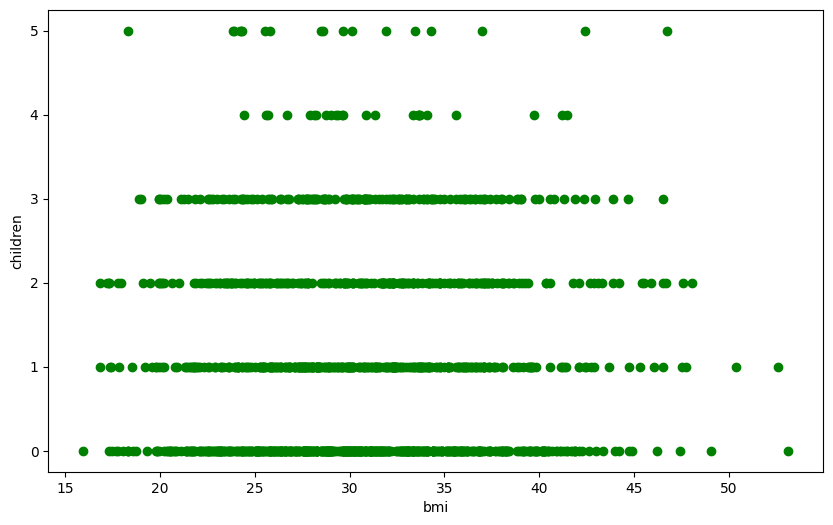

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(data['bmi'],data['children'], color='g', label='BMI-Children relation')
plt.xlabel('bmi')
plt.ylabel('children')
plt.show()

## there isn't any meaningful corelation between children and bmi values

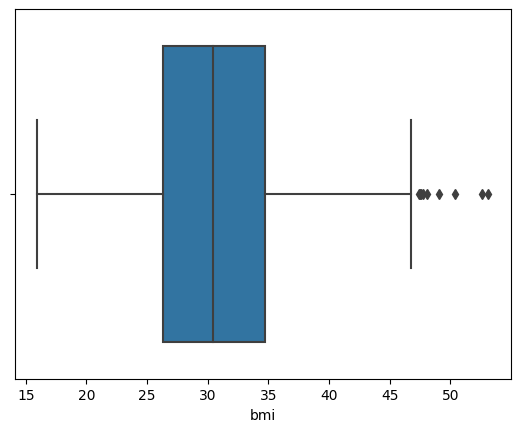

In [76]:
sns.boxplot(x= 'bmi',data=data);

## as seen from the boxplot illustration there are 7 outliers in the bmi dataset

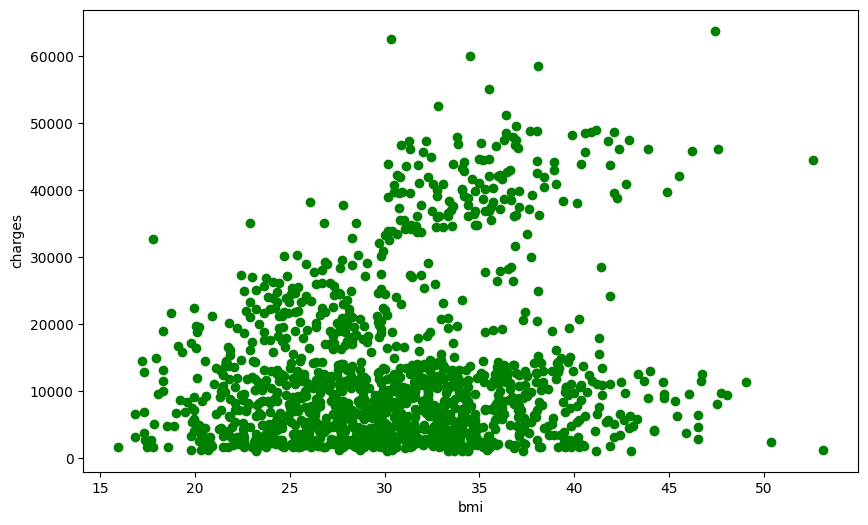

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(data['bmi'],data['charges'], color='g', label='BMI-Charge relation')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

## There seems to be a meaningful positive trend between bmi and insurence charges

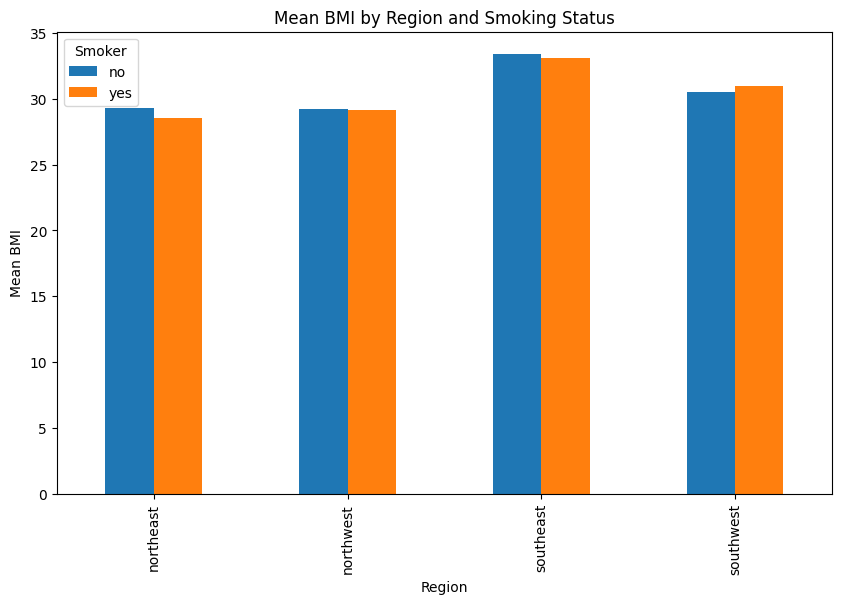

In [78]:
grouped_data = data.groupby(['region', 'smoker'])['bmi'].mean().reset_index()


pivot_data = grouped_data.pivot(index='region', columns='smoker', values='bmi')


ax = pivot_data.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Region')
ax.set_ylabel('Mean BMI')
ax.set_title('Mean BMI by Region and Smoking Status')
ax.legend(title='Smoker')

plt.show()

## There is bmi differance in "southeast" specifically but smoking doesn't really
## affect the BMI value.

# Model Development

In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['sex'] = label_encoder.fit_transform(data['sex'])
data['region'] = label_encoder.fit_transform(data['region'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])

y = data['charges']
X= data.drop(['charges'],axis=1)

In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [81]:
from sklearn.metrics import mean_squared_error, r2_score

## Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test,predictions,squared=False)
r2 = r2_score(y_test,predictions)
print(f"(Linear Regression)R2 score: {r2:.2f}")
print(f"(Linear Regression)Mean Squared Error: {mse:.2f}")
## Linear Regression

## Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100, random_state=42)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions,squared=False)
print(f"(Random Forest)R2 score: {r2:.2f}")
print(f"(Random Forest)Mean Squared Error: {mse:.2f}")
## Random Forest

## Ridge Regression
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.2)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test,predictions,squared=False)
r2 = r2_score(y_test,predictions)
print(f"(Ridge Regression)R2 score: {r2:.2f}")
print(f"(Ridge Regression)Mean Squared Error: {mse:.2f}")
## Ridge Regression

## Between the models I tried the best one was Random Forest with R2 score of 0.86

(Linear Regression)R2 score: 0.78
(Linear Regression)Mean Squared Error: 5799.59
(Random Forest)R2 score: 0.86
(Random Forest)Mean Squared Error: 4590.57
(Ridge Regression)R2 score: 0.78
(Ridge Regression)Mean Squared Error: 5800.25


## Optimization

In [83]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


predictions = best_model.predict(X_test)

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions,squared=False)
print(f"(Best Random Forest)R2 score: {r2:.6f}")
print(f"(Best Random Forest)Mean Squared Error: {mse:.2f}")
print(f"Best Parameters: {best_params}")

## Max R2 score = 0.87
## Max Mean Squared Error = 4533.21
## Best Hyperparameters ='max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50

## Thanks for reviewing my project!!


(Best Random Forest)R2 score: 0.867632
(Best Random Forest)Mean Squared Error: 4533.21
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
